In [1]:
# Import necessary libraries

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
np.random.seed(0)

%matplotlib inline

## 1.  Data 
# a. Load Country-data.csv into a pandas dataframe. Print out the header. Use pandas.DataFrame.describe to summarize the data. Using markdown, explain the meaning of each column and make observations about the dataset.

In [2]:
# Load Country-data.csv into a pandas dataframe
data = pd.read_csv("Country-data.csv")

In [3]:
# Print out the header
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
# Use pandas.DataFrame.describe to summarize the data and print out the summary table
summary = data.describe() 
print(summary)

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

### Explain the meaning of each column and make observations about the dataset.
In summary, we can see that  \
**child_mort**: Child mortality rate per 1,000 live births.\
**exports**: Exports as a percentage of GDP.\
**health**: Health expenditure per capita.\
**imports**: Imports as a percentage of GDP.\
**income**: Gross national income (GNI) per capita.\
**inflation**: Annual inflation rate percentage.\
**life_expec**: Life expectancy at birth.\
**total_fer**: Total fertility rate.\
**gdpp**: GDP per capita.  

**The child mortality rate** varies widely among countries, with a substantial range from as low as 2.60 to as high as 208.00. The high standard deviation indicates significant variability in child mortality rates. The median (19.30) is much lower than the mean (38.27), **suggesting a right-skewed distribution with some countries having very high rates**.  

**Export percentages** vary greatly, from as low as 0.11% to as high as 200%. The wide range and high standard deviation indicate that some countries are heavily dependent on exports, while others are less so. **The median is somewhat lower than the mean, suggesting a skew towards higher values**.  
 
**Health expenditure per capita shows a large range and variability**, with a mean of 6.82 and a maximum of 17.90. The distribution is relatively tight, but still varies, with a standard deviation of 2.75. **The values are relatively low compared to other economic indicators**. 

**Import percentages** show a large range and significant variability, with a high mean of 46.89 and a maximum of 174.00. The wide range suggests diverse economic structures and trade dependencies. **The median is slightly lower than the mean, indicating a distribution skewed towards higher import values.**

Analysis of these indicators shows that there are great differences in economy and health among countries, and **these differences are often made more obvious by the influence of a few extreme values**.

### b. Use pandas.DataFrame.info to check if the entries are the correct datatype, and if there are any missing values. Use pandas.DataFrame.duplicates to check for duplicate entries. Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types. Use markdown to make observations and explain what you have done. 

In [5]:
# Get a summary information of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
# Check for duplicate rows and then print them out
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []


In [7]:
# Convert the data type of "income" and "gdpp" from int64 into float64 for data type consistency
data['income'] = data['income'].astype('float64')
data['gdpp'] = data['gdpp'].astype('float64')
# Print DataFrame information to check the data type after conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(9), object(1)
memory usage: 13.1+ KB


From the information of the dataset, we can see that all columns have 167 non-null items, indicating that there are **no missing values** in the dataset.

The result of the duplicate check also showed there is **no duplication**.

But we can see that the data types of "income" and "gdpp" are int64, and the others are float64. In order to maintain the consistency of the dataset and the convenience of calculation, we convert these data types from "int64" into "float64".

### c. Drop the 'country' column and store it in a separate dataframe. Use seaborn.heatmap to display the correlation matrix of the features. Use seaborn.pairplot to generate scatter plots and histograms. Use markdown to make observations. 

In [8]:
# Drop the 'country' column from dataset
country = data['country']
data.drop('country', axis=1, inplace=True) # inplace=True returns NONE

In [9]:
# Compute correlation matrix
corr_matrix = data.corr() #corr() method calculates the correlation between columns

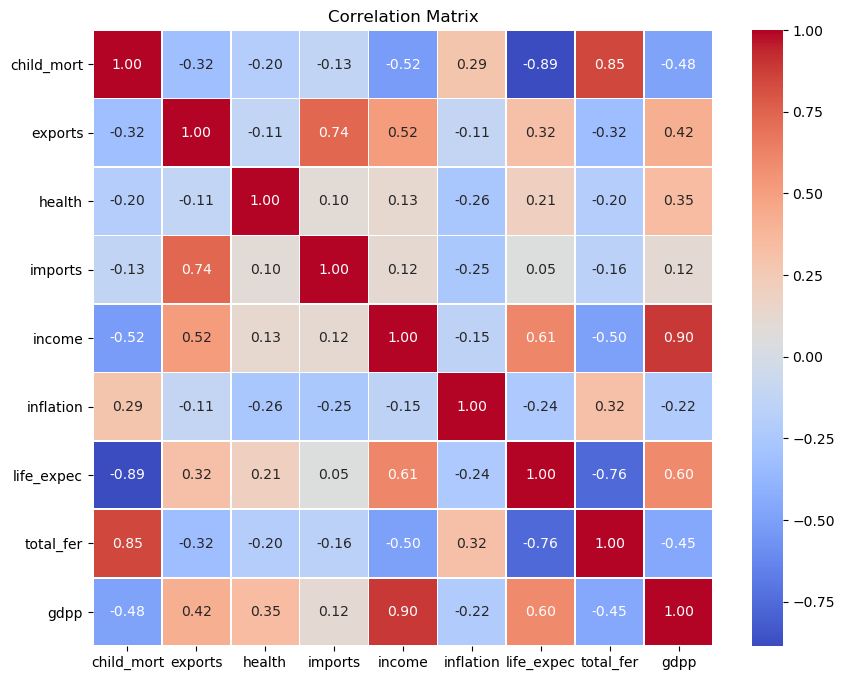

In [10]:
# Plot the heatmap
#annot=True values are displayed inside the heatmap cells
#cool colors (like blue) represent negative correlations, and warm colors (like red) represent positive correlations
plt.figure(figsize=(10, 8)) # 10 * 8 matrix graph
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) #annot: True, write the data value in each cell.
plt.title('Correlation Matrix')
plt.show()

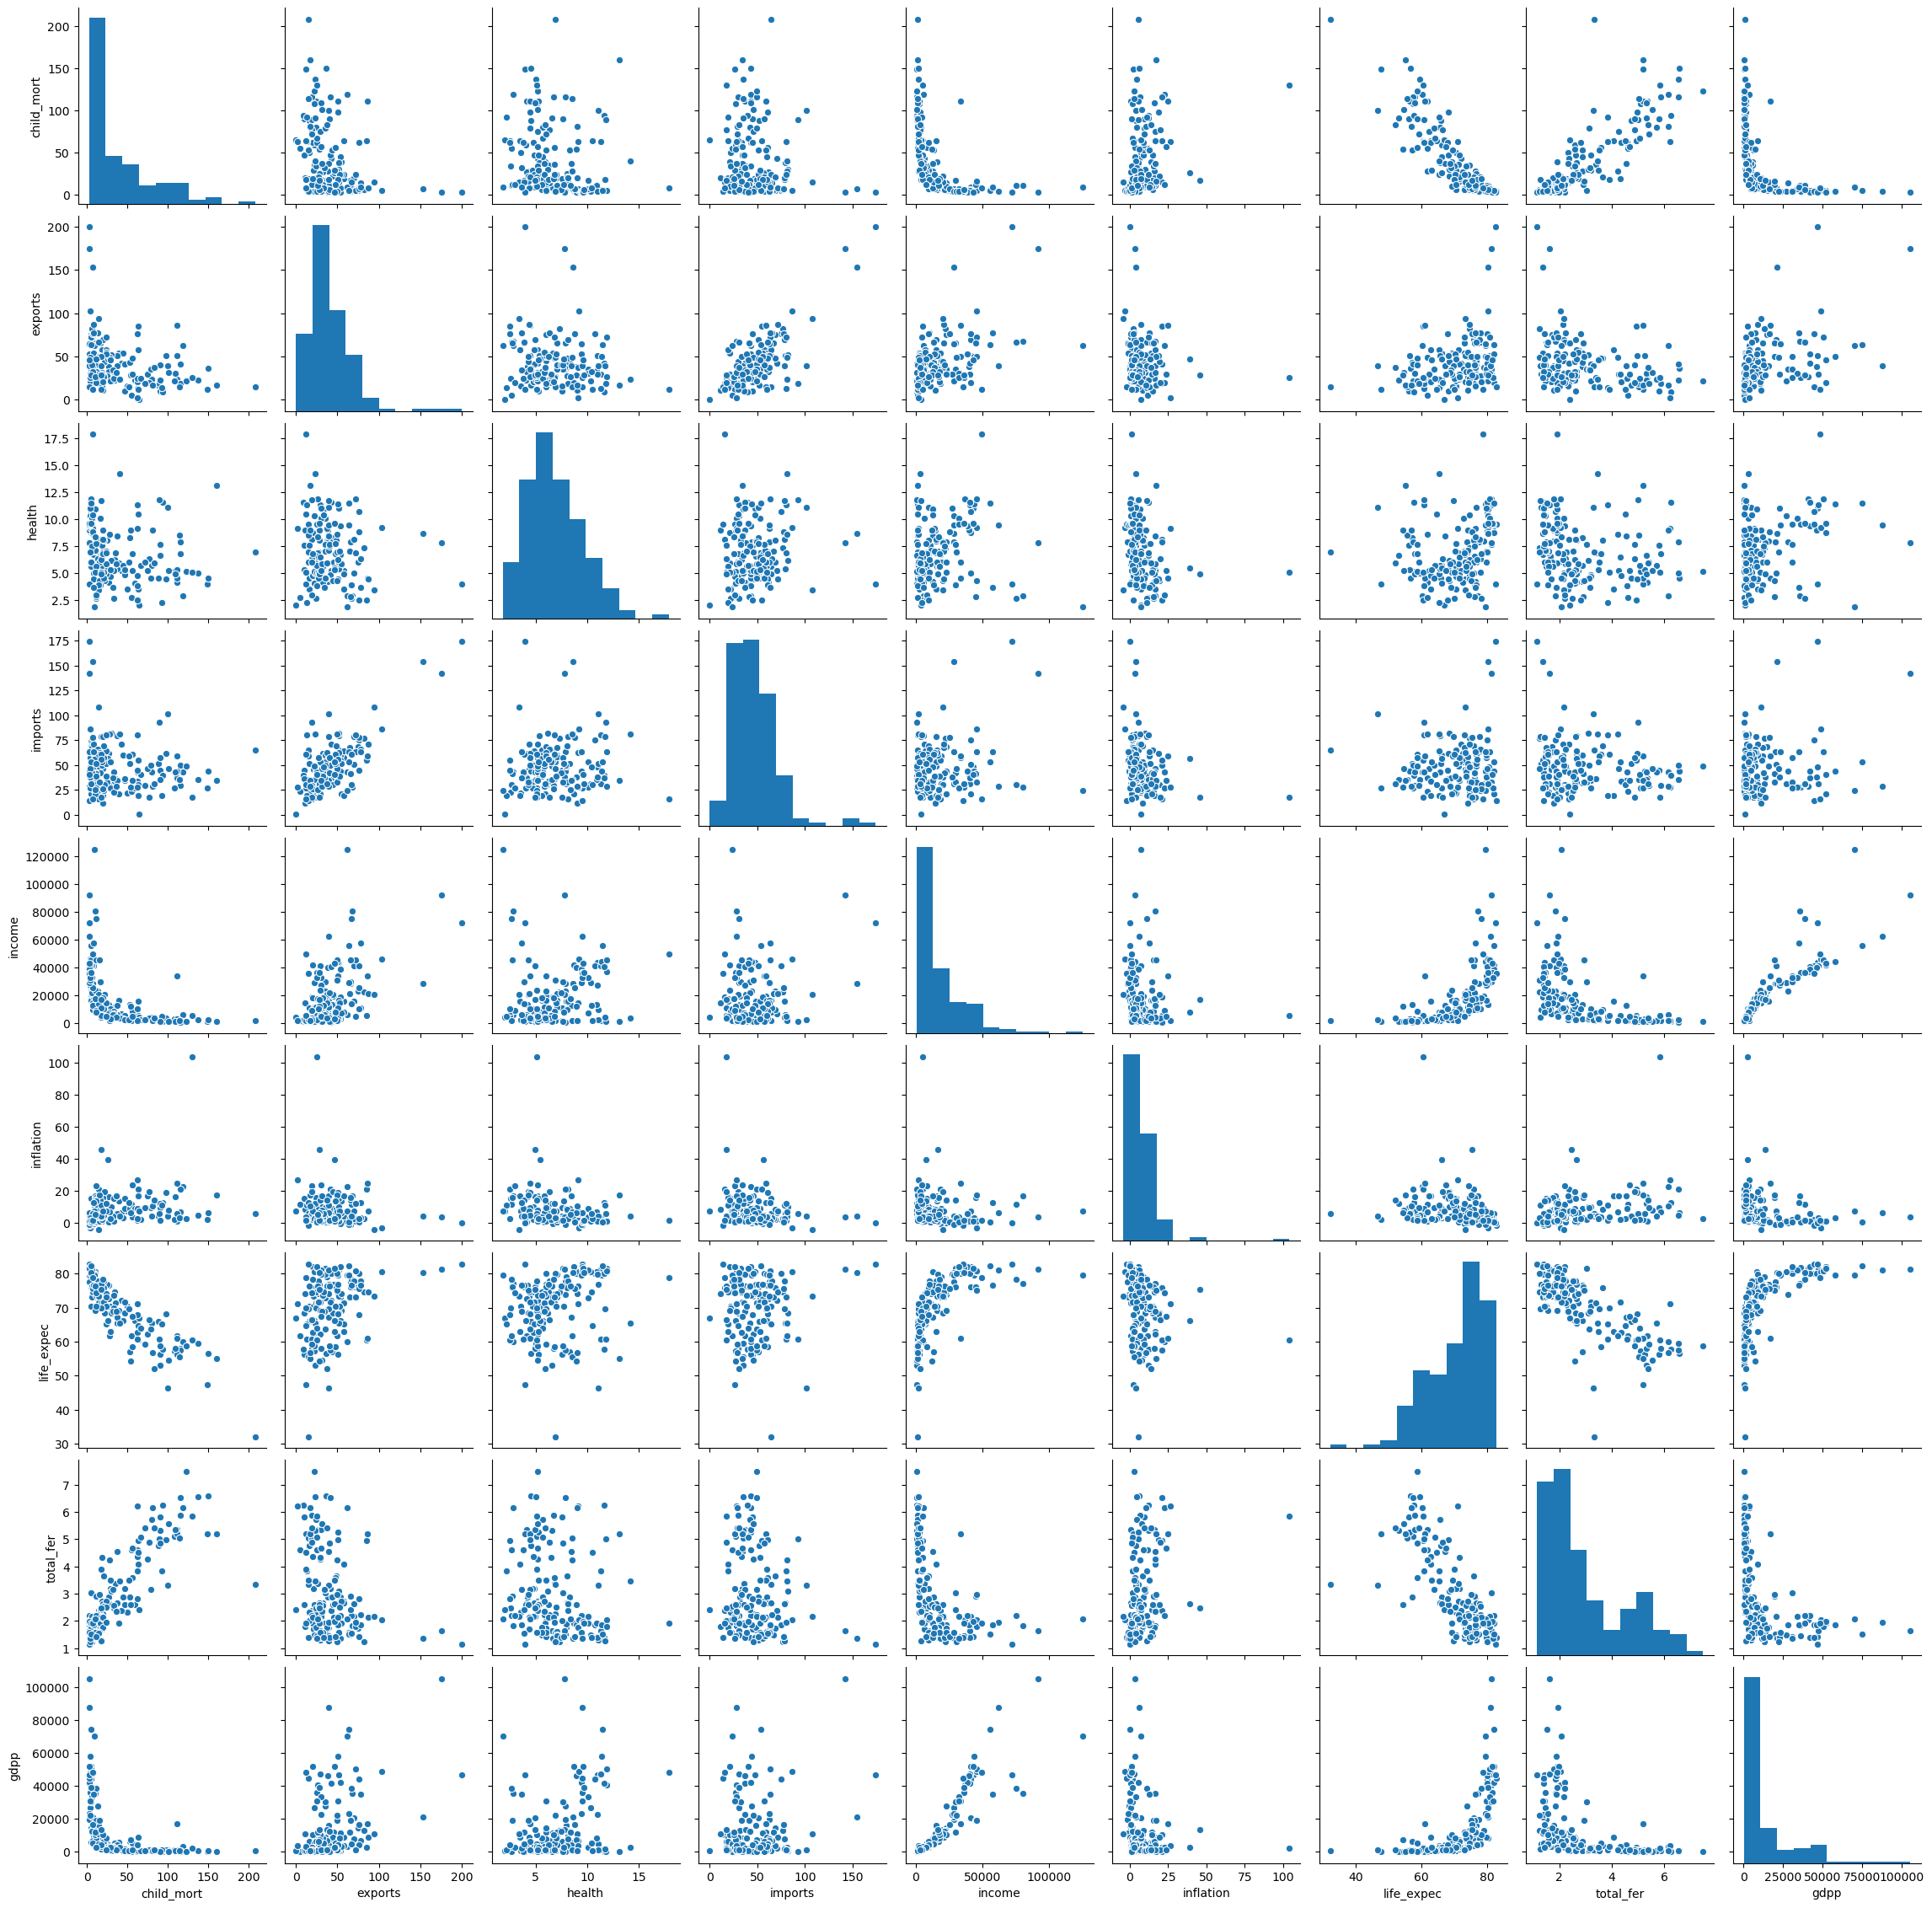

In [11]:
# Draw the scatter plot matrix
sns.pairplot(data) # sns.pairlot() generates a pairwise relationships graph to show the relationship between X-axis and Y-axis value
plt.show()

From the heatmap and pairplot, we found that **"income"** and **"gdpp" (GDP per person)** are **highly correlated(0.90)**, we remove 'income' since they both reflect similar economic indicators to avoid redundant information.

Similarly, **"child_mort" (child mortality)** and **"life_expec" (life expectancy)** are **highly negatively correlated (-0.89)**, we move 'child_mort' due to the same reason.

In [12]:
# Drop the 'income' and 'child_mort'columns from dataset
data.drop(['income','child_mort'], axis=1, inplace=True) # Operate on the original dataset

## 2. Modeling      

###  a. Use sklearn.preprocessing.StandardScaler to scale the data. Print the header.

In [13]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [14]:
# Fit and transform the data
scaled_data = scaler.fit_transform(data)

In [15]:
# Convert the scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

In [16]:
# Print the header
scaled_df.head()

exports    health   imports  inflation  life_expec  total_fer      gdpp
0 -1.138280  0.279088 -0.082455   0.157336   -1.619092   1.902882 -0.679180
1 -0.479658 -0.097016  0.070837  -0.312347    0.647866  -0.859973 -0.485623
2 -0.099122 -0.966073 -0.641762   0.789274    0.670423  -0.038404 -0.465376
3  0.775381 -1.448071 -0.165315   1.387054   -1.179234   2.128151 -0.516268
4  0.160668 -0.286894  0.497568  -0.601749    0.704258  -0.541946 -0.041817

In [17]:
# Show the information of scaled DataFrame
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 7 columns):
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(7)
memory usage: 9.2 KB


### b. Use sklearn.cluster.KMeans to cluster the data. Try values of n_cluster in the range [2, 10]; calculate and store the silhouette score for each.

In [18]:
# Store the silhouette scores for each cluster number
silhouette_scores = []

# Define the range of cluster numbers
cluster_range = range(2,11)

In [19]:
for K in cluster_range:
    kmeans = KMeans(n_clusters=K, random_state=42)  # Initialize KMeans，random_state=42 is to make sure that the data sets are split in the same way.
    labels = kmeans.fit_predict(scaled_data)  # Fit the model and get cluster label  
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    print(f"K = {K}, Silhouette Score = {score}")

K = 2, Silhouette Score = 0.26359322499336346
K = 3, Silhouette Score = 0.26412587759749623
K = 4, Silhouette Score = 0.2803562677392239
K = 5, Silhouette Score = 0.2788660659858198
K = 6, Silhouette Score = 0.24838338663274687
K = 7, Silhouette Score = 0.24740086779236165
K = 8, Silhouette Score = 0.2456357647350142
K = 9, Silhouette Score = 0.2191592023492265
K = 10, Silhouette Score = 0.2161741048356292


### c. Create a plot of silhouette score vs. n_clusters. Using this plot, justify the number of clusters for this use case in a markdown cell. Save the corresponding model as your best model.

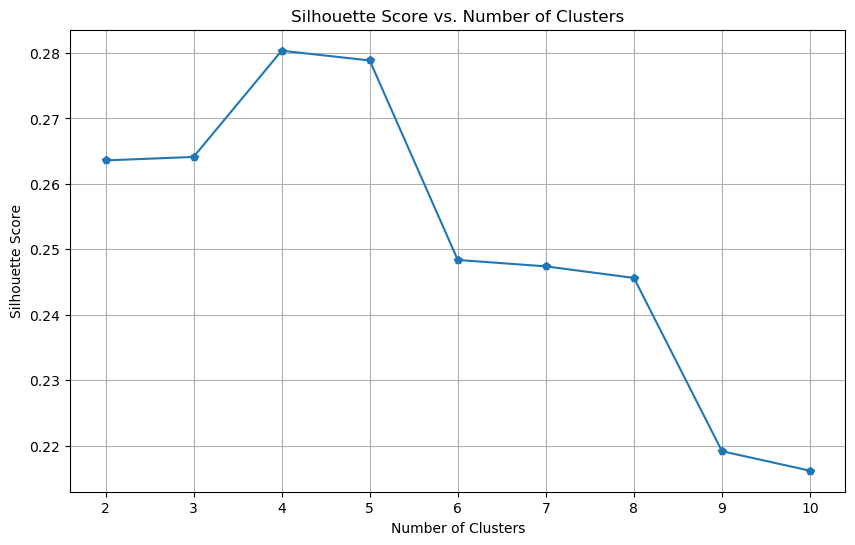

In [20]:
# Create a plot of silhouette score vs. n_clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='p')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

From the plot, the Silhouette score reaches its highest value(0.28) when there are 4 clusters, which means the model performs the best when there are 4 clusters.

In [21]:
# When K= 4, the model has the best performance
kmeans_best = KMeans(n_clusters=4, random_state=42)

##  3. Conclusion
###  a. Based on your analysis in step 1, choose a pair of columns and generate a scatter plot of the data. Use the model predictions to colour the points according to the cluster they belong to. Use markdown to comment on the plot.

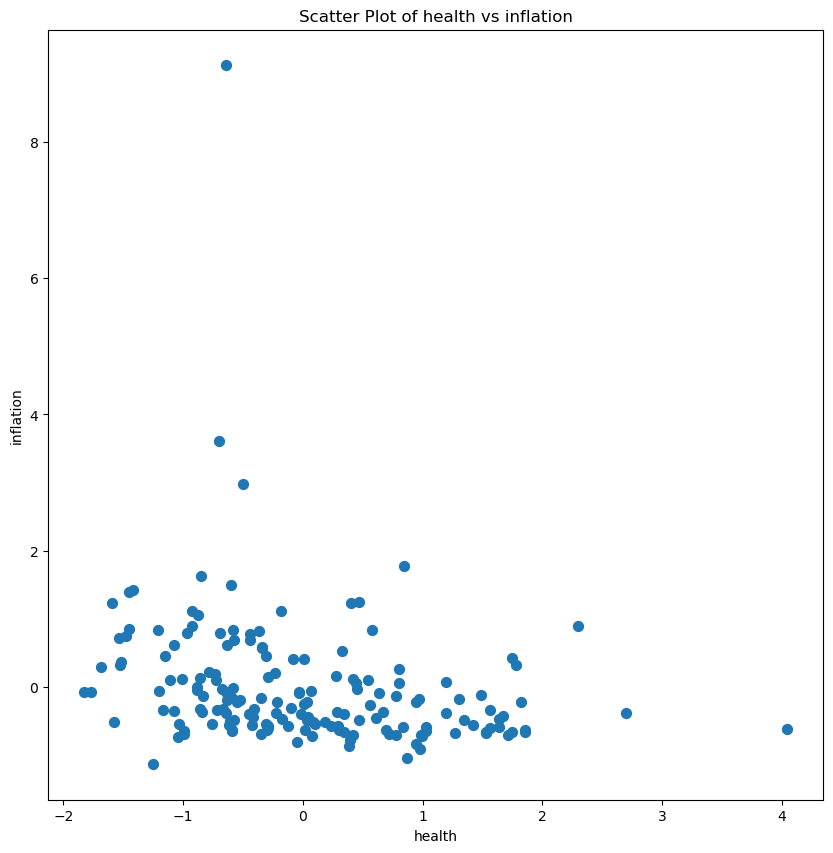

In [22]:
# Choose a pair of columns ('health' and 'inflation') and generate a scatter plot of the data. 
plt.figure(figsize=(10, 10))
plt.scatter(scaled_data[:, 1], scaled_data[:, 3], s=50) # scaled_data[:, 1]: health, scaled_data[:, 3]: inflation
plt.title('Scatter Plot of health vs inflation')
plt.xlabel('health')
plt.ylabel('inflation')
plt.show()

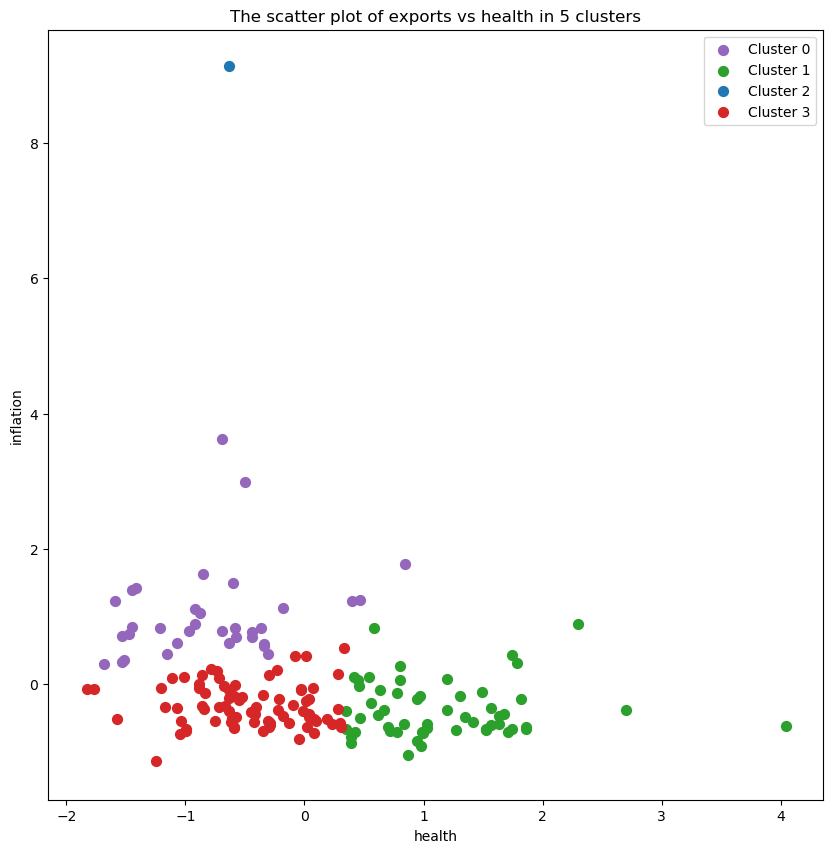

In [23]:
# kmeans_best is the best KMeans model we fitted previously
health_inflation = scaled_data[:, [1, 3]]  # Extract the 'health' and 'inflation columns
 
# Make Label_2 be the name of this prediction
labels_2 = kmeans_best.fit_predict(health_inflation)
 
# Assign different colors to different clusters
cluster_colors = ['tab:purple', 'tab:green', 'tab:blue', 'tab:red']
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
 
# Draw a scatter plot of each cluster
plt.figure(figsize=(10, 10))
for cluster_id in range(4):
    plt.scatter(
        health_inflation[labels_2 == cluster_id, 0],  # X axis： 'health'
        health_inflation[labels_2 == cluster_id, 1],  # Y axis： 'inflation'
        c=cluster_colors[cluster_id],  # color
        label=cluster_labels[cluster_id],  # label
        s=50
    )
 
# Add title and labels
plt.title('The scatter plot of exports vs health in 5 clusters')
plt.xlabel('health')
plt.ylabel('inflation')
 
# Append Legend
plt.legend()

plt.show()

From the scatter plot of **'health'** vs **'inflation'**, there are 4 clusters, it is evident that the clustering quality is high as most data points are well-grouped within their clusters.  

**Cluster 2 (Blue)** might be the outlier because it is distant from other data point, however, this case should be discussed based on real situation in Nigeria.

Based on the location of the cluster distribution, we can see that **cluster 0 (purple)** countries have the worst inflation and bad health condition. Then, **cluster 3 (red)** countries have lower inflation, but its health condition remains almost the same level as cluster 0 countries. And, **cluster 1 (green)** countries have better health conditions and relatively low inflation.

### b. Generate a histogram that shows the number of countries in each cluster. Use markdown to comment on the histogram.

In [24]:
# Change scaled_data into a DataFrame df，and colunms "country" and "lables" 
df = pd.DataFrame(health_inflation, columns=['health', 'inflation'])
df['country'] = country # Add 'country' column with country names
df['cluster'] = labels_2 
print(df)

       health  inflation                         country  cluster
0    0.279088   0.157336                     Afghanistan        3
1   -0.097016  -0.312347                         Albania        3
2   -0.966073   0.789274                         Algeria        0
3   -1.448071   1.387054                          Angola        0
4   -0.286894  -0.601749             Antigua and Barbuda        3
5    0.468966   1.244725                       Argentina        0
6   -0.882089  -0.001123                         Armenia        3
7    0.699011  -0.628316                       Australia        1
8    1.527901  -0.655549                         Austria        1
9   -0.341667   0.571037                      Azerbaijan        0
10   0.392285  -0.775674                         Bahamas        1
11  -0.673953  -0.032435                         Bahrain        3
12  -1.203420  -0.060901                      Bangladesh        3
13   0.421497  -0.707926                        Barbados        1
14  -0.440

In [25]:
cluster_count = df.groupby('cluster')['country'].count()
print(cluster_count)

cluster
0    34
1    55
2     1
3    77
Name: country, dtype: int64


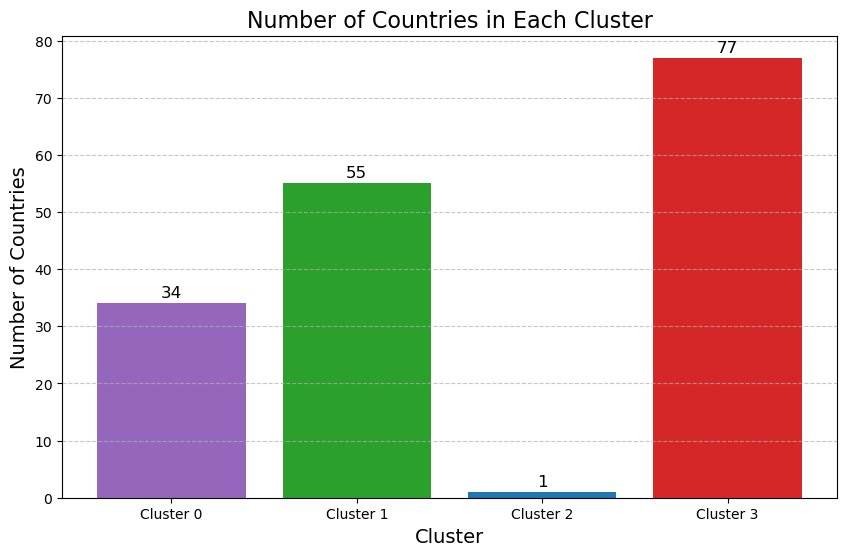

In [26]:
# Assuming `df` contains the countries and their respective clusters
cluster_count = df.groupby('cluster')['country'].count()

# Define colors and labels to match the scatter plot provided
cluster_colors = ['tab:purple', 'tab:green', 'tab:blue', 'tab:red']
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# Generate a histogram that shows the number of countries in each cluster
plt.figure(figsize=(10, 6))
plt.bar(cluster_count.index, cluster_count.values, color=cluster_colors)  # Use predefined colors
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)
plt.title('Number of Countries in Each Cluster', fontsize=16)

# Add the number of countries as labels on top of the bars
for i in range(len(cluster_count)):
    plt.text(cluster_count.index[i], cluster_count.values[i] + 1, str(cluster_count.values[i]), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.xticks(ticks=range(len(cluster_labels)), labels=cluster_labels)  # Set x-ticks to match cluster labels
plt.show()

### c. Print out the names of the countries within each cluster. Use markdown to comment on the countries that show up in each cluster. State the order of the clusters from those that need aid the most, to those that need aid the least.

In [27]:
# Print the country names in each cluster using for loop
for i in range(4):
    # filter out countries based on their clusters
    cluster_countries = df[df['cluster'] == i]['country'].tolist()
    print(f"Cluster {i} countries:")
    print(cluster_countries)
    print("\n")

Cluster 0 countries:
['Algeria', 'Angola', 'Argentina', 'Azerbaijan', 'Belarus', 'Brunei', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Ghana', 'Guinea', 'Indonesia', 'Iran', 'Kazakhstan', 'Kuwait', 'Libya', 'Mauritania', 'Mongolia', 'Nepal', 'Oman', 'Pakistan', 'Russia', 'Saudi Arabia', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Timor-Leste', 'United Arab Emirates', 'Uzbekistan', 'Venezuela', 'Yemen', 'Zambia']


Cluster 1 countries:
['Australia', 'Austria', 'Bahamas', 'Barbados', 'Belgium', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Burundi', 'Canada', 'Chile', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guinea-Bissau', 'Iceland', 'Iraq', 'Ireland', 'Italy', 'Japan', 'Jordan', 'Kiribati', 'Lesotho', 'Liberia', 'Luxembourg', 'Malta', 'Micronesia, Fed. Sts.', 'Moldova', 'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Portugal', 'Rwanda', 'Serbia', 'Sierra Leone', 

### Conclusion

<span style="color: purple;">**Cluster 0 (Purple):**</span>  
Countries in Cluster 0 generally have the highest inflation and worst health condition.  
They are the most in need of international aid and support.


**Aid budget**： 80%  
**Aid for each country in this cluster**: 80%*100 billion /34 = **2.35 billion**

<span style="color: green;">**Cluster 1 (Green)**:</span>  
Cluster 1 contains countries with relatively high economic and health indicators, suggesting better economic conditions. These countries typically have better health condition than most countries and relatively low inflation.  

**They don't need external aid.**

<span style="color: blue;">**Cluster 2 (Blue)**:</span>  
The only country in Cluster 2 has the highest inflation with extreme bad health condition. According to tis actual economic development status, it does need most external assistance.

**Aid budget**： 4%  
**Aid for each country in this cluster**: 4%*100 billion = **4 billion**

<span style="color: red;">**Cluster 3 (Red)**:</span>  
Cluster 3 countries are neither the most underdeveloped nor the most developed, but often struggle with poor health condition with low to moderate inflation rate. Countries in this cluster may require some targeted aid.  

**Aid budget**： 16%  
**Aid for each country in this cluster**: 16%*100 billion /77 = **0.21 billion**

### d. Use markdown to describe which countries will get funds, and how much each will get.

#### **Analysis of Clusters:**  
<span style="color: purple;">**Cluster 0 (Purple):**</span> needs a lot of aid due to poor economic and health indicators.

**Aid budget**： 80%  
**Aid for each country in this cluster**: 80%*100 billion /34 = **2.35 billion**


<span style="color: red;">**Cluster 3 (Red)**:</span>    Countries in this cluster require some targeted aid, focusing on improving specific sectors like healthcare.

**Aid budget**： 16%  
**Aid for each country in this cluster**: 16%*100 billion /77 = **0.21 billion**


<span style="color: blue;">**Cluster 2 (Blue)**:</span>  The only country in this category needs most external aid to get rid of its inflation crisis. 

**Aid budget**： 4%  
**Aid for each country in this cluster**: 4%*100 billion = **4 billion**

<span style="color: green;">**Cluster 1 (Green)**:</span> Countries in this cluster do not need external assistance due to their good economic indicator and average health metrics.  